# Happiness Score Report 

### Contents 
There are six factors which effect happiness scores.<br>
**1.Economy (GDP per Capita) <br>
2.Family<br>
3.Healthy (Life Expectancy)<br>
4.Freedom<br>
5.Trust (Government Corruption)<br>
6.Generosity**<br>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
lr = LinearRegression()
svc = SVR()
knn = KNeighborsRegressor(n_neighbors=3)
mlp = MLPRegressor()
dt = DecisionTreeRegressor()

models = [lr, svc, knn, mlp, dt]

In [3]:
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.to_csv("happines_data_trained_assignment_20220416.csv")

In [6]:
df = pd.read_csv("happines_data_trained_assignment_20220416.csv")

In [7]:
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


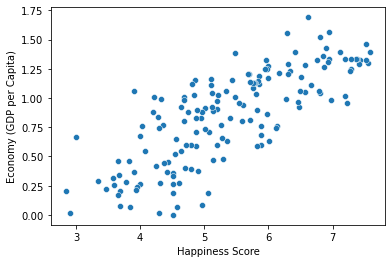

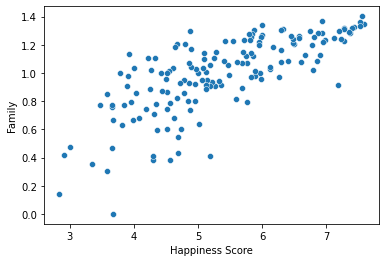

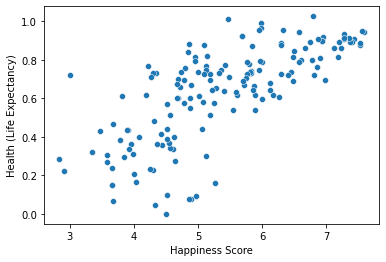

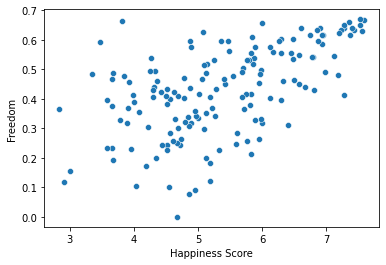

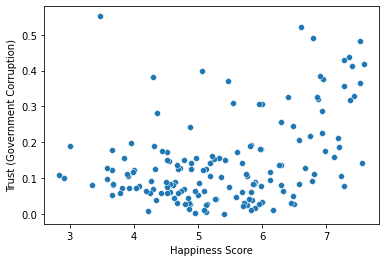

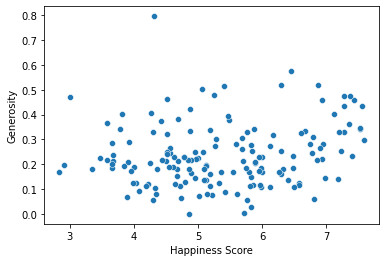

In [8]:
for graph in df.columns[6:12]:
    sns.scatterplot(x='Happiness Score',y=graph,data=df)
    plt.show()

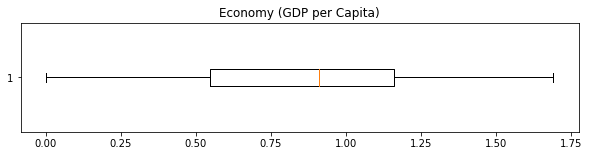

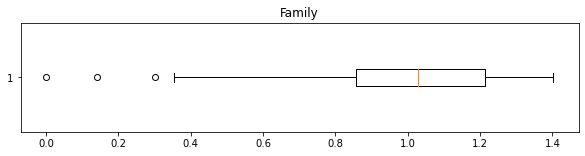

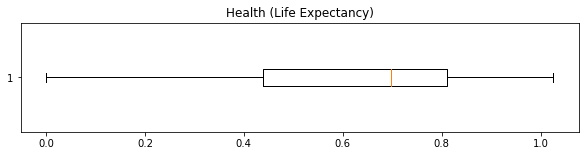

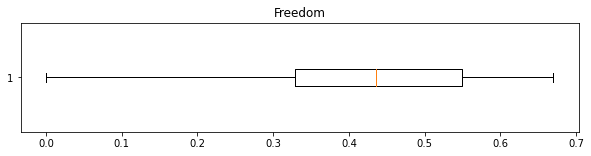

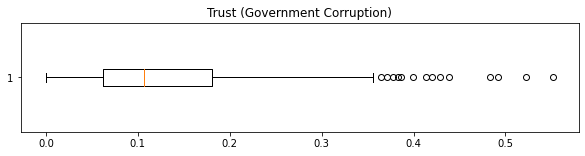

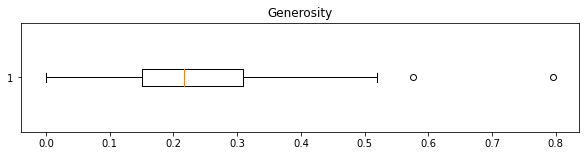

In [9]:
collist = df.columns[6:12].values
for plot in collist:
    plt.subplots(figsize=(10,2))
    plt.boxplot(df[plot], vert=0)
    plt.title(plot)
    plt.show()

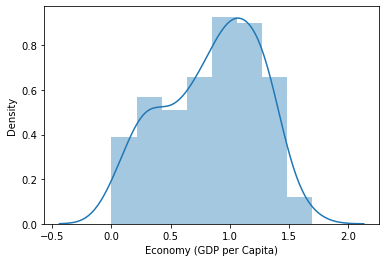

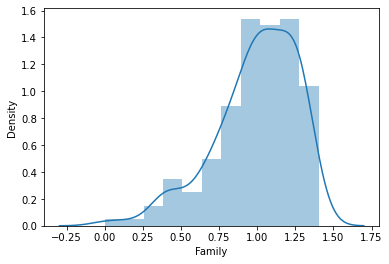

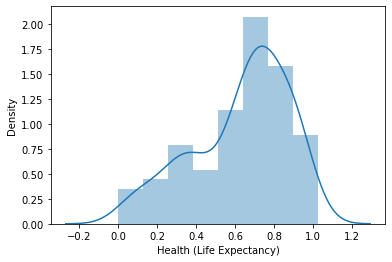

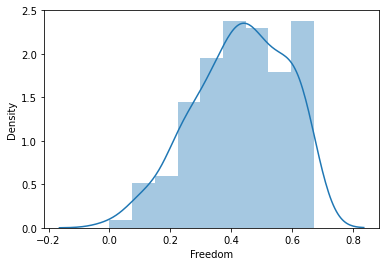

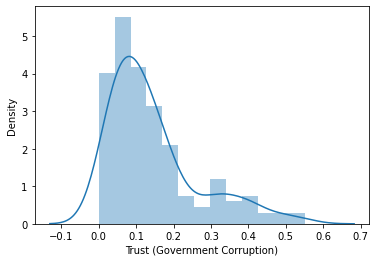

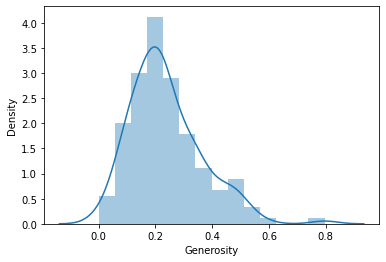

In [10]:
for graph in df.columns[6:12]:
    sns.distplot(df[graph])
    plt.show()

Six Factors which effect Happiness Scores

In [11]:
six_factores = df.iloc[:,6:12]
happiness_scores = df.loc[:,'Happiness Score']

In [12]:
x = six_factores
y =  happiness_scores

print(x.shape)
print(y.shape)
models

(158, 6)
(158,)


[LinearRegression(),
 SVR(),
 KNeighborsRegressor(n_neighbors=3),
 MLPRegressor(),
 DecisionTreeRegressor()]

LinearRegression() :  76.533 Working
SVR() :  79.661 Working
KNeighborsRegressor(n_neighbors=3) :  83.411 Working
MLPRegressor() :  73.091 Working
DecisionTreeRegressor() :  100.0 Working


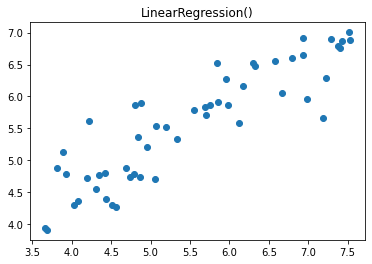

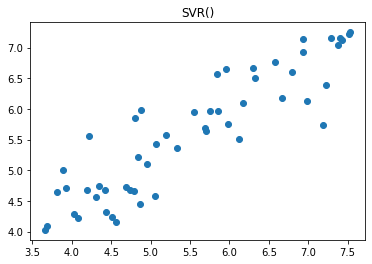

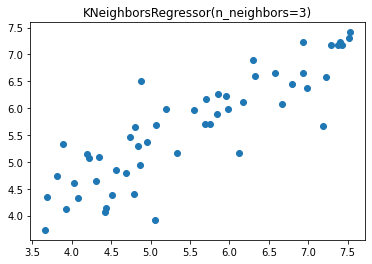

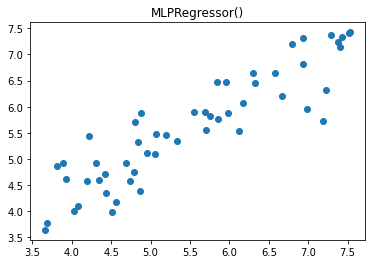

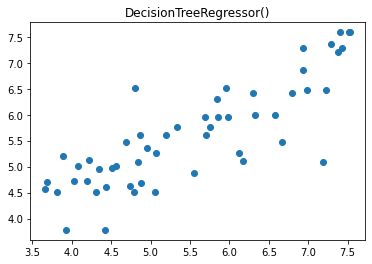

In [13]:

for i in models:
    try:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33, random_state = 40)
        i.fit(x_train, y_train)
        print(f"{i} : ",round(i.score(x_train, y_train)*100,3),'Working')

        
        fig,ax = plt.subplots(figsize=(6,4))
        plt.scatter(y_test, i.predict(x_test))
        plt.title(i)

        
    except:
        print(f'{i} : ','Not Working')

Decision Tree is showing great fit in accuracy score but when we Plot the graph it is showing other story

0.854685134128754
[5.73466667 5.58166667 3.66166667 4.06766667 4.51233333 7.031
 7.50666667 4.26166667 3.41966667 5.20733333 5.17333333 6.04933333
 5.32166667 4.384      5.09566667 6.29       6.52       3.90233333
 4.941      5.50366667 4.212      5.121      6.9        4.369
 4.34833333 3.70266667 4.376      4.96833333 5.437      4.39466667
 5.66366667 6.02133333 4.08833333 4.91433333 3.41966667 6.437
 6.44033333 7.031      5.09533333 6.42433333 3.70266667 5.67033333
 4.145      5.55733333 7.031      4.46833333 7.35333333 5.82433333
 6.307      6.9        6.78833333 4.29966667 6.50266667]
66     5.689
46     5.984
156    2.905
151    3.587
119    4.517
4      7.427
7      7.364
121    4.512
130    4.292
85     5.124
134    4.194
11     7.226
104    4.788
77     5.268
126    4.350
72     5.429
31     6.485
114    4.610
76     5.286
55     5.833
141    3.904
61     5.759
27     6.611
84     5.129
146    3.681
154    3.340
150    3.655
133    4.218
56     5.828
117    4.550
41     6.130
9

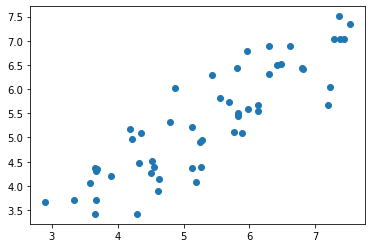

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33)
nn = KNeighborsRegressor(n_neighbors=3)
nn.fit(x_train, y_train)
print(nn.score(x_train, y_train))

fig,ax = plt.subplots(figsize=(6,4))
plt.scatter(y_test, nn.predict(x_test))

print(nn.predict(x_test))
print(y_test)

<AxesSubplot:>

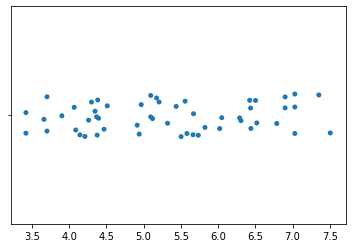

In [197]:
sns.stripplot(nn.predict(x_test))

**Looking at the graph shows that the MLP Regressor fits better among all the models.**

In [ ]:
test_df = df.loc[[8,15,30,45,70,120,130,155],:]
test_df

In [ ]:
x = test_df.iloc[:,6:12]

y = test_df.loc[:,['Happiness Score']]
x['happy'] = test_df.iloc[:,4]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=46)
dt.fit(x_train, y_train)
print(svc.score(x_train, y_train))
# plt.plot(dt.predict(x_test),'.')
# plt.plot(y_test)
print(dt.predict(x_test))
# plt.plot(y_test.sort_index())
# plt.plot(y_test,'.')
# plt.scatter(y_test, dt.predict(x_test))
sns.distplot(dt.predict(x_test))s

In [39]:
cluster = KMeans(n_clusters=3)

In [44]:
cluster.fit(df['Happiness Score'].values.reshape(-1,1))

KMeans(n_clusters=3)

In [213]:
y_km = cluster.fit_predict(df.iloc[:,6:13], df['Happiness Score'].values.reshape(-1,1))

In [ ]:
plt.scatter(
)

**Centroid Points**

In [115]:
cluster.cluster_centers_

array([[5.46769841],
       [4.15858182],
       [6.904475  ]])

**Each countries Happiness Score is Categorized 
Based on three emotions:**<br>
1)Very Happy<br>
2)Neutral<br>
3)Unhappy

In [114]:
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [88]:
np.unique(cluster.labels_)

array([0, 1, 2])

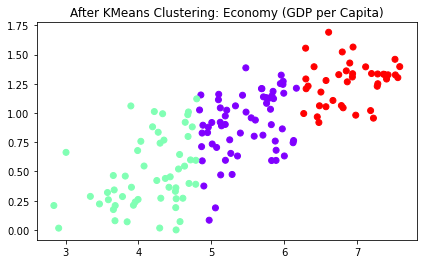

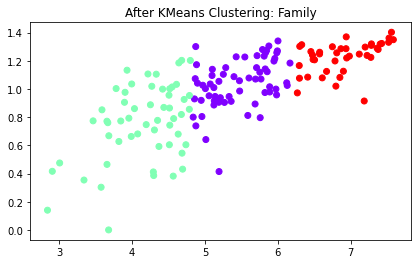

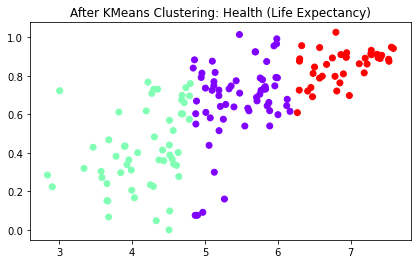

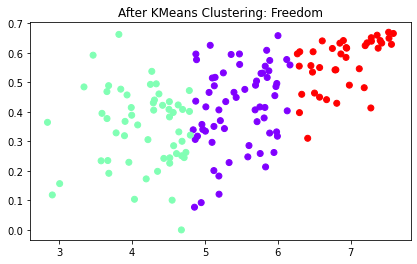

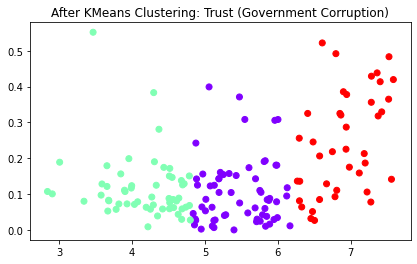

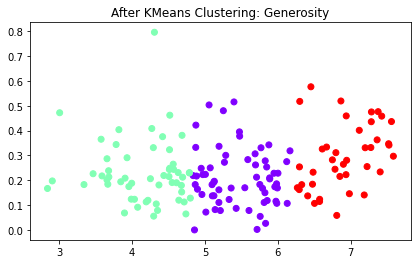

In [193]:
for i in collist:
     
    fig,ax = plt.subplots(figsize = (15,4))  
    plt.subplot(1,2,2)
    plt.scatter(x=df['Happiness Score'].values.reshape(-1,1), y = df[i].values.reshape(-1,1), c=cluster.labels_, cmap='rainbow')
    plt.title(f'After KMeans Clustering: {i}')
    plt.show()
    

In [219]:
X = df[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]

In [222]:
# for i in range(1,11):
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [281]:
Y_pred = km.fit_predict(x)
Y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [282]:
X['cluster'] = Y_pred
X['happy'] = df["Happiness Score"]

In [283]:
X[X['cluster']==1].head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,cluster,happy
77,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,1,5.268
80,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,1,5.194
84,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,1,5.129
90,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,1,5.057
93,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,1,4.971


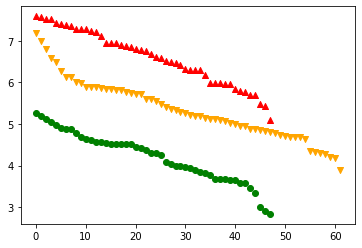

In [284]:
df1 = X[X['cluster']==0]
df2 = X[X['cluster']==1]
df3 = X[X['cluster']==2]

#Plot1
plt.scatter(range(0,len(df1.happy)), df1.happy, c = 'Orange', marker='v')

plt.scatter(range(0,len(df2.happy)),df2.happy, c = 'Green', marker='o')

plt.scatter(range(0,len(df3.happy)),df3.happy, c = 'Red', marker='^')
# plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,3], c = 'Black', marker='*')


In [285]:
km.cluster_centers_

array([[0.89562952, 1.01329419, 0.67575806, 0.38917339, 0.09680129,
        0.17562419],
       [0.34882875, 0.73764063, 0.33451271, 0.36255167, 0.12754771,
        0.26152729],
       [1.27951812, 1.21571396, 0.86723688, 0.54562354, 0.21951417,
        0.2927225 ]])

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,cluster
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2
5,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2
6,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2
7,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2
8,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2
9,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2


In [267]:
df

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
